# PIR - LSTM n°4: Attempt with validation data

In this notebook, predictions are based solely on calendar-related features. The model is not autoregressive, as it does not use past attendance values as inputs.

## 1: Imports

In [ ]:
# Custom utility functions used in the project
import utils
import modelsV1 # Chronological split for validation data
import modelsV2 # Random split for validation data

import importlib

# Disable GPU to avoid TensorFlow conflicts
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, SimpleRNN
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error

2026-01-12 17:09:23.153955: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-12 17:09:23.201259: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-12 17:09:28.112210: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# In case of 'utils.py' modifications
importlib.reload(utils)

<module 'utils' from '/home/pedoussa/Bureau/PIR 5A/utils.py'>

In [ ]:
# In case of 'modelsV1.py' modifications
importlib.reload(modelsV1)

<module 'models' from '/home/pedoussa/Bureau/PIR 5A/models.py'>

In [ ]:
# In case of 'modelsV2.py' modifications
importlib.reload(modelsV2)

## 2: Model Validation on 2022 data

### 2.1: Data Preparation

In [4]:
# Load the data
x = pd.read_csv('train_f_x.csv')
y = pd.read_csv('y_train_sncf.csv')

In [ ]:
# Data preparation
df_per_station_train, df_per_station_test = utils.prepare_train_data(x, y, remove_covid=True)

/home/pedoussa/Bureau/PIR 5A/utils.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['station_id'] = data['station'].map(station_mapping)
/home/pedoussa/Bureau/PIR 5A/utils.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['station_id'] = data['station'].map(station_mapping)


### 2.2: Sampling

In [6]:
# Create a sample of stations
sample_size = 10
seed = 563

# train
sample_train = utils.sample_stations(df_per_station_train, sample_size, seed)
print("sample_train: ", sample_train.keys())

# test
sample_test = {
    station: df_per_station_test[station]
    for station in sample_train.keys()
}

print("sample_test: ", sample_test.keys())

sample_train:  dict_keys(['6WR', 'WIX', 'KQC', '92P', 'SAD', 'RDK', 'N6O', '2P1', 'UAJ', 'TGW'])
sample_test:  dict_keys(['6WR', 'WIX', 'KQC', '92P', 'SAD', 'RDK', 'N6O', '2P1', 'UAJ', 'TGW'])


In [7]:
# Keep true values 
sample_test_true = {
    station: df_per_station_test[station].copy()
    for station in sample_train.keys()
}

### 2.3: Predictions

In [ ]:
# Parameters
seq_len = 100
units = 35
activation = 'tanh'
learning_rate = 0.0008
batch_size = 32

# Epochs
epochs = 15

In [15]:
# Execution flag
run_experiment = 0

In [ ]:
# Execution (chronological validation data)
if (run_experiment == 1):
    # Run
    sample_test_1, mape_results_1, all_losses_1 = modelsV1.lstm_model(sample_train, sample_test, sample_test_true,
                                                                      sample_size, seq_len, units, activation, learning_rate, batch_size,
                                                                      epochs=epochs, early_stop = False,
                                                                      features = ['job', 'ferie', 'vacances'])

In [ ]:
# Execution (random validation data)
if (run_experiment == 1):
    # Run
    sample_test_2, mape_results_2, all_losses_2 = modelsV2.lstm_model(sample_train, sample_test, sample_test_true,
                                                                      sample_size, seq_len, units, activation, learning_rate, batch_size,
                                                                      epochs=epochs, early_stop = False,
                                                                      features = ['job', 'ferie', 'vacances'])

### 2.4: Explore Results

In [ ]:
# Display MAPE results
utils.show_mape_results(mape_results_1)

MAPE per station:
  station      MAPE
0     6WR  0.452866
1     WIX  0.162447
2     KQC  5.041530
3     92P  0.961449
4     SAD  0.875906
5     RDK  0.831836
6     N6O  0.316537
7     2P1  0.196659
8     UAJ  1.961810
9     TGW  1.769578

Average MAPE over all stations: 1.2571


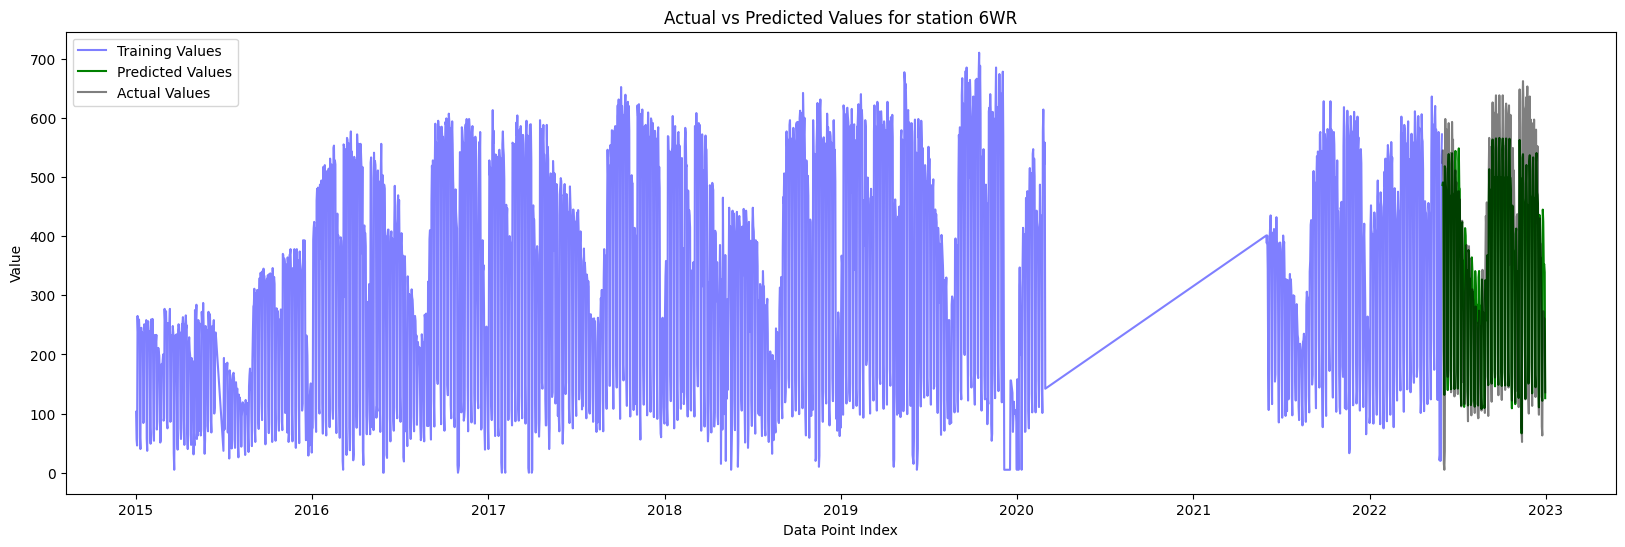

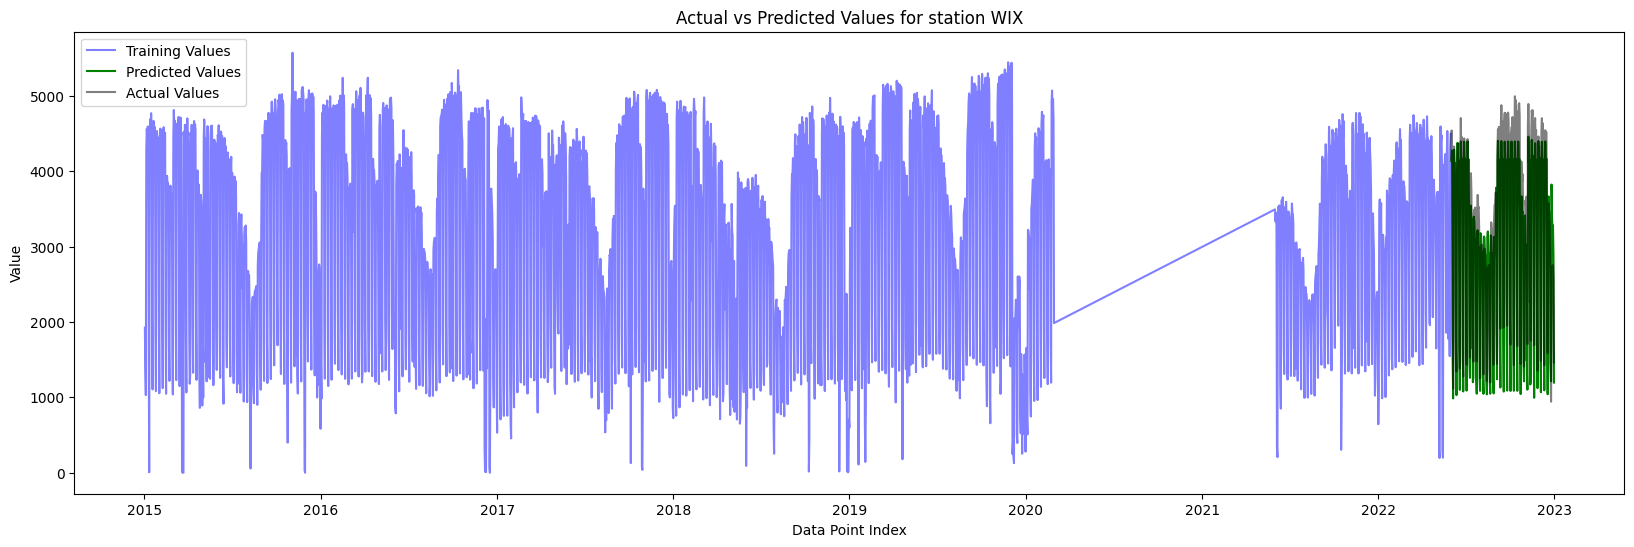

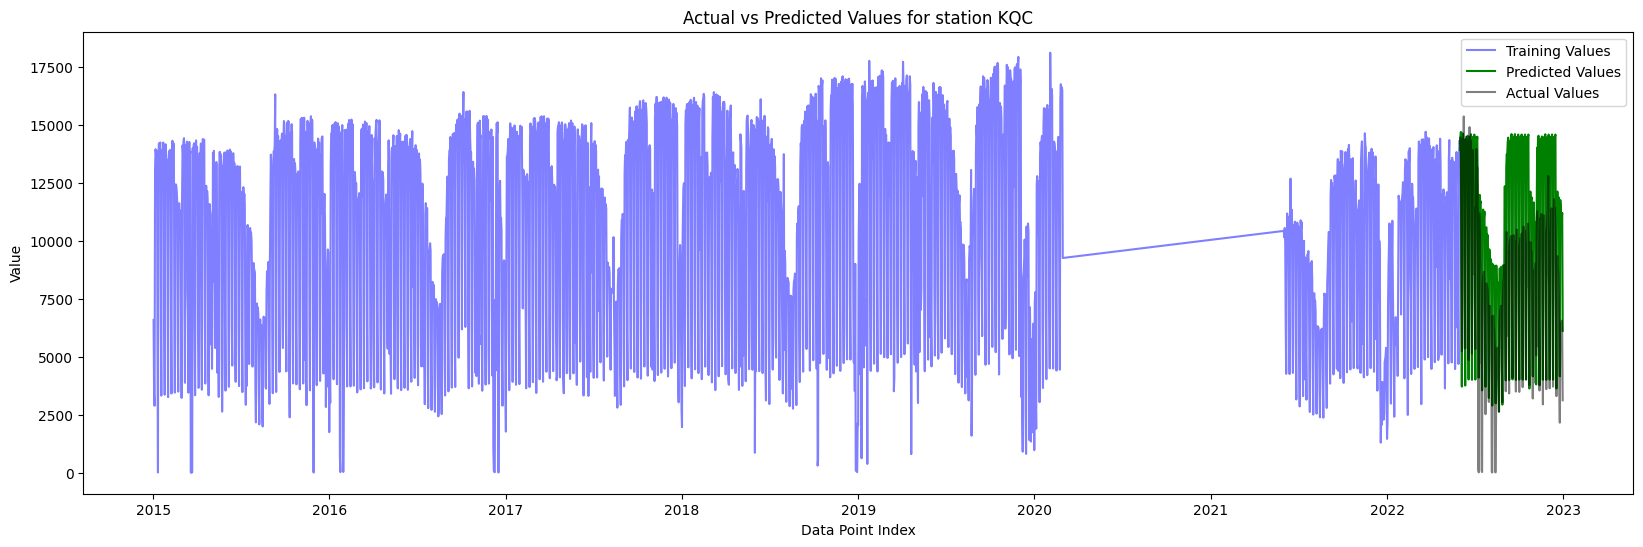

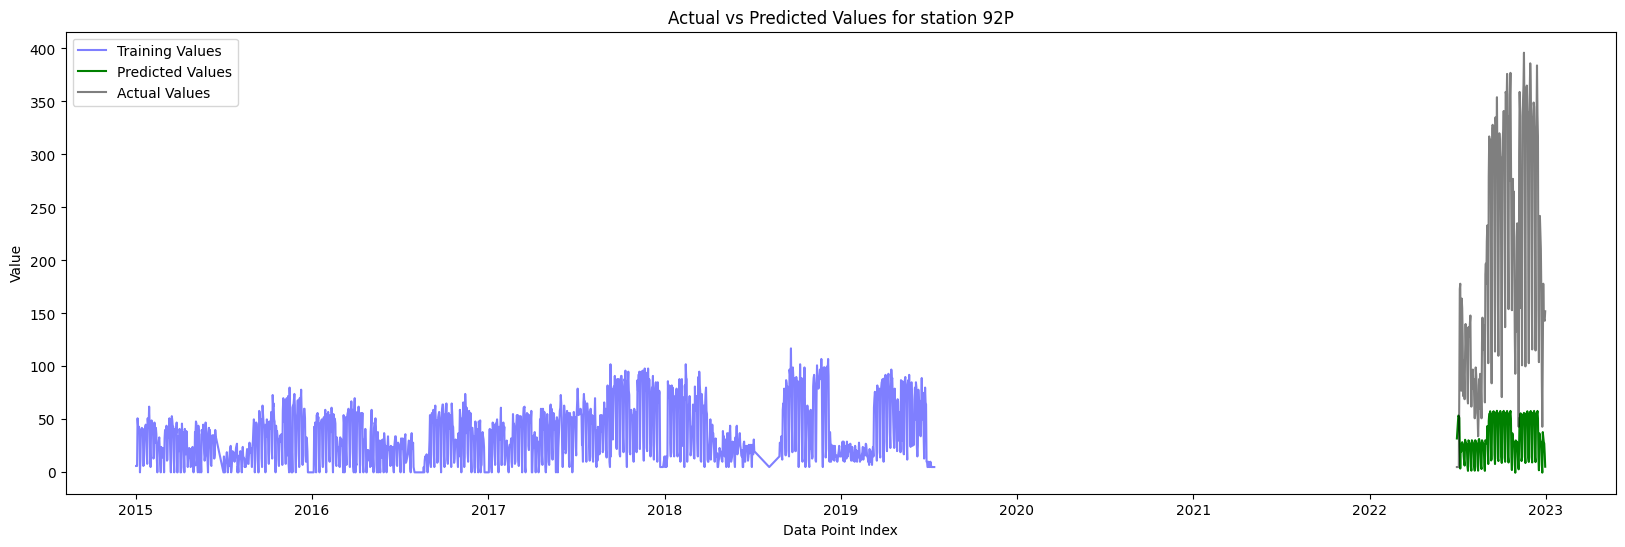

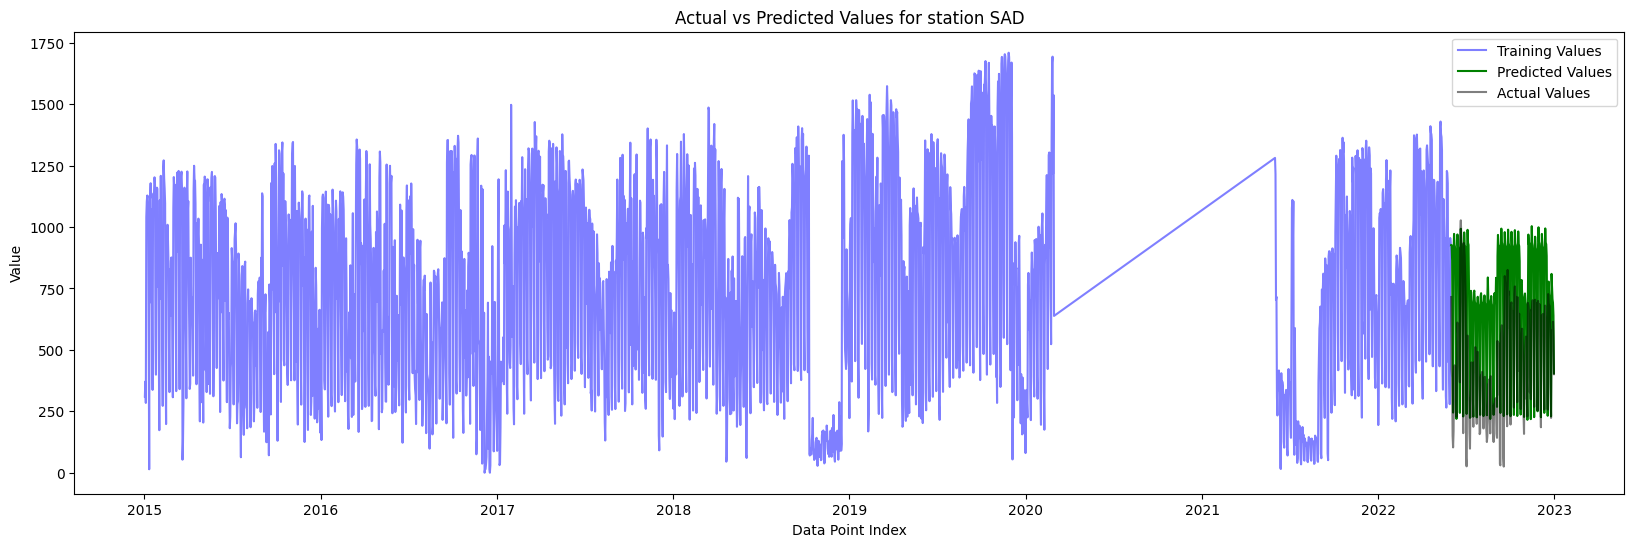

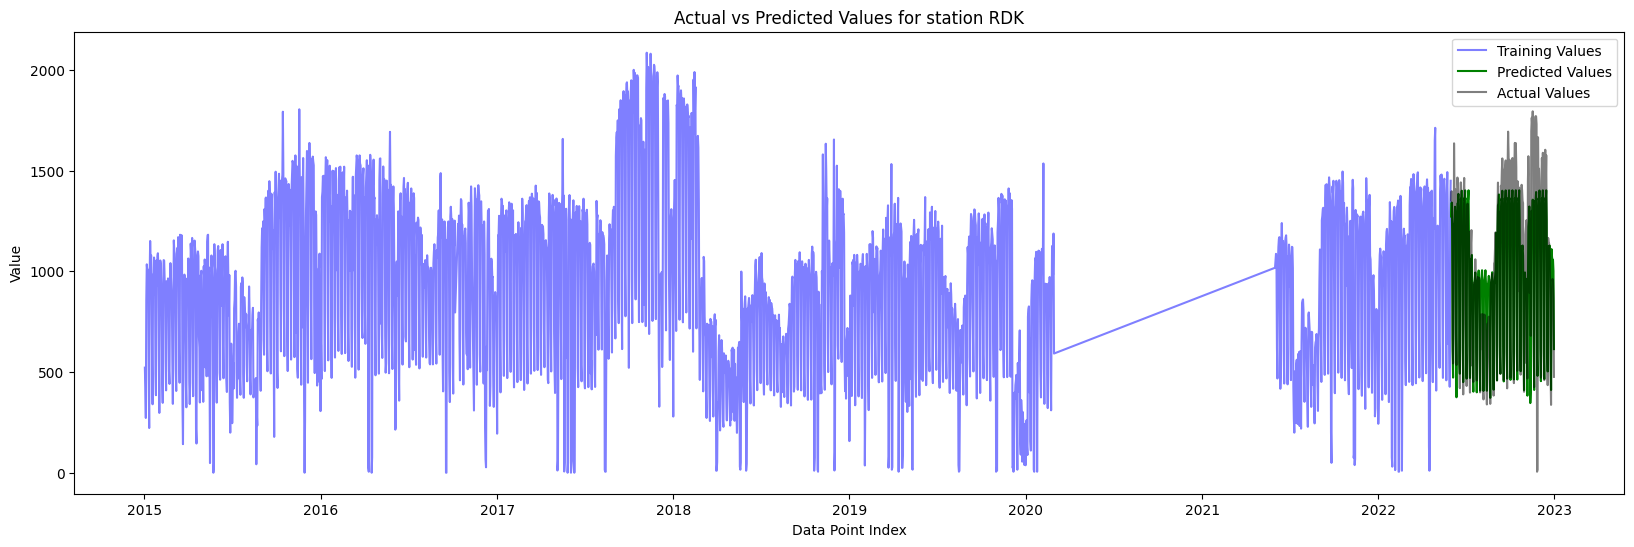

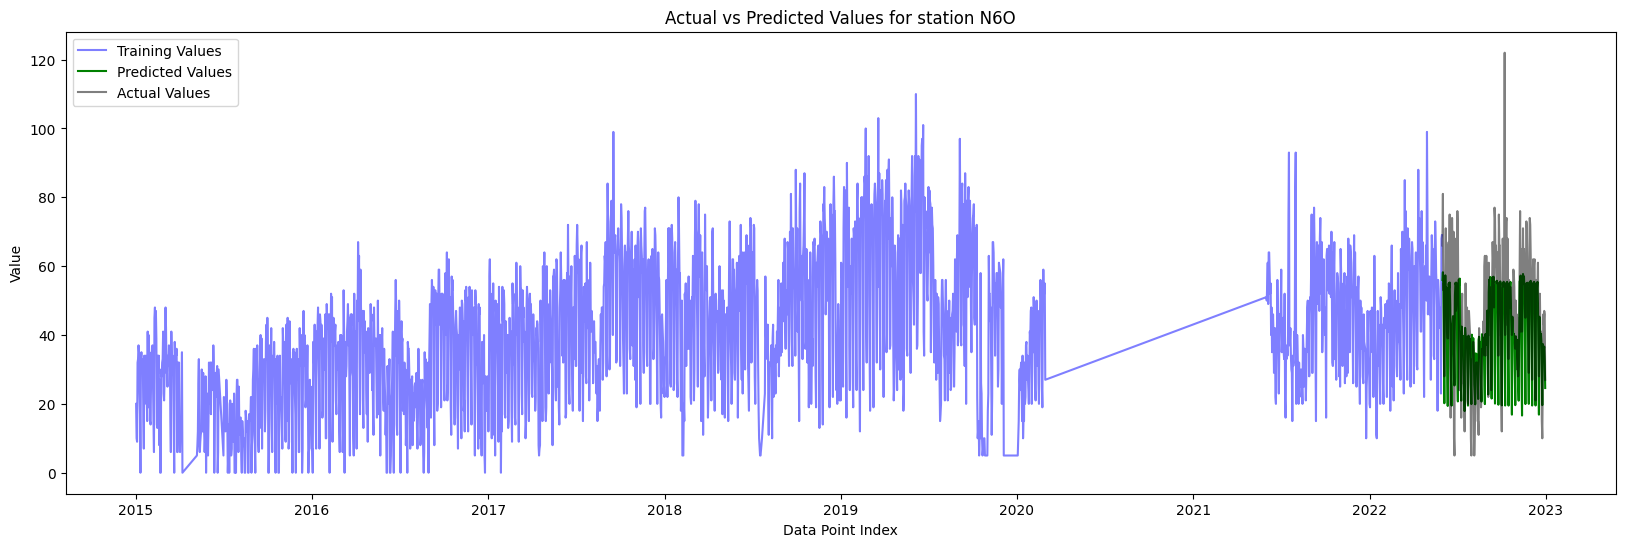

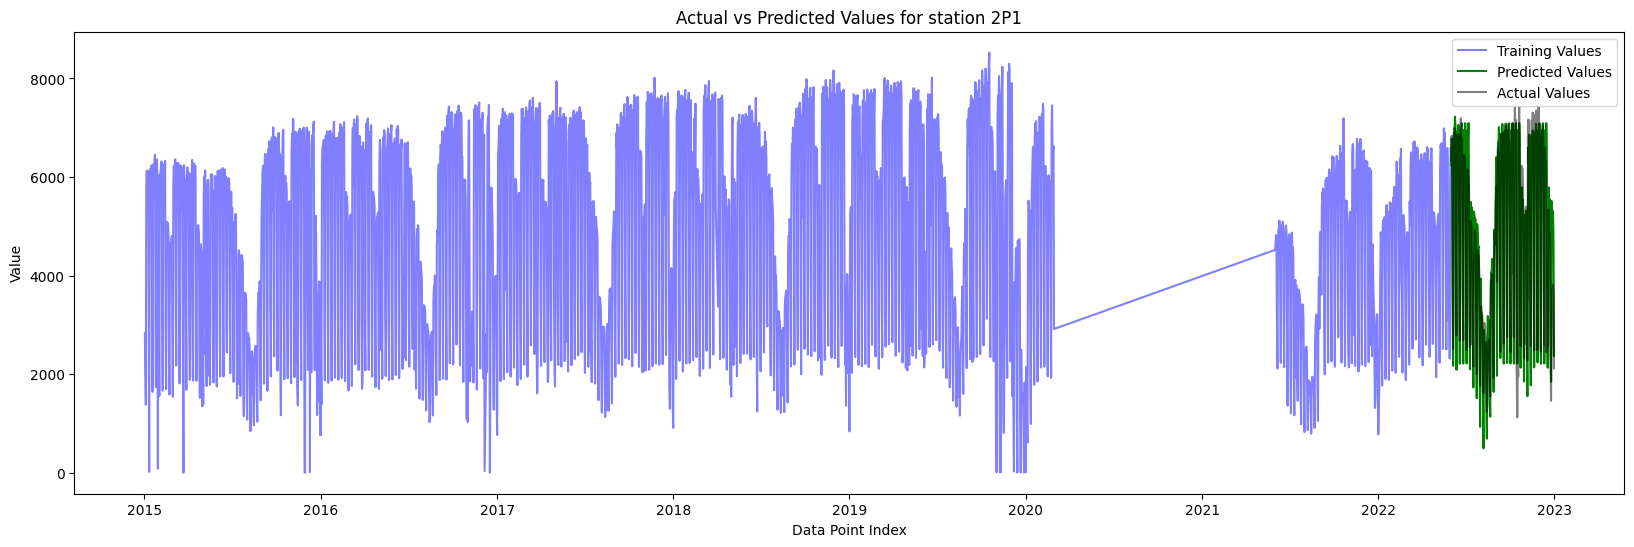

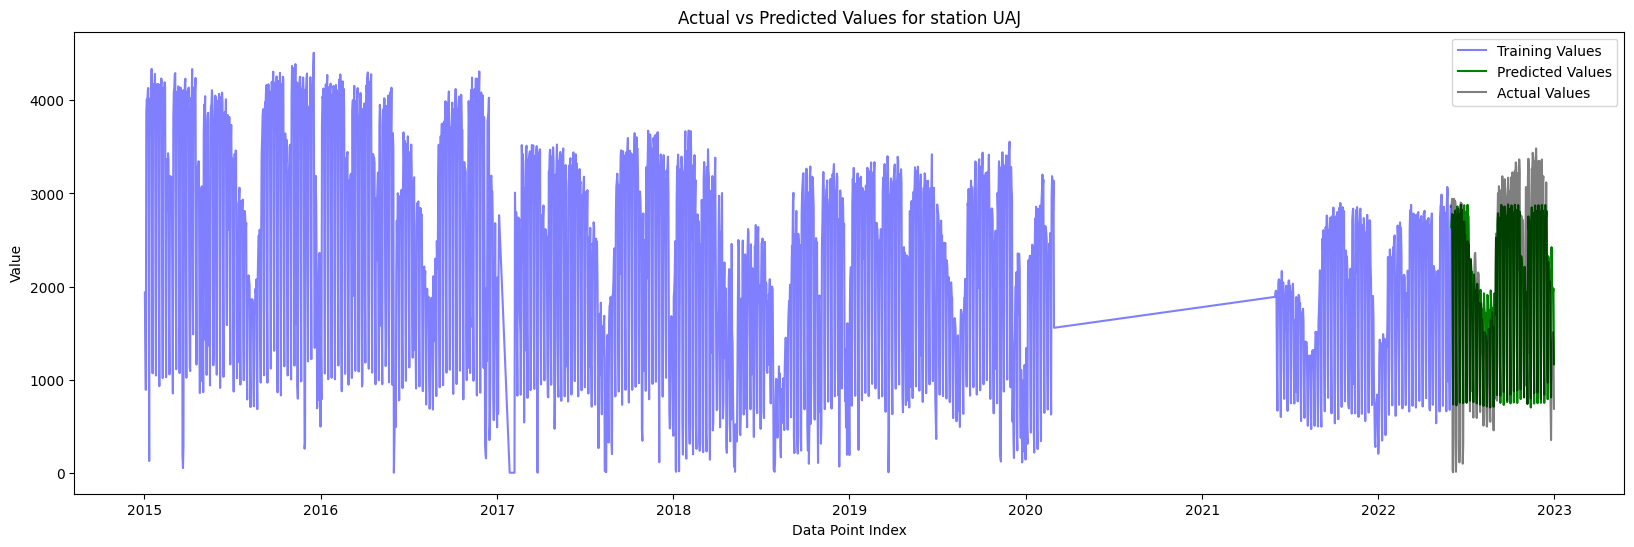

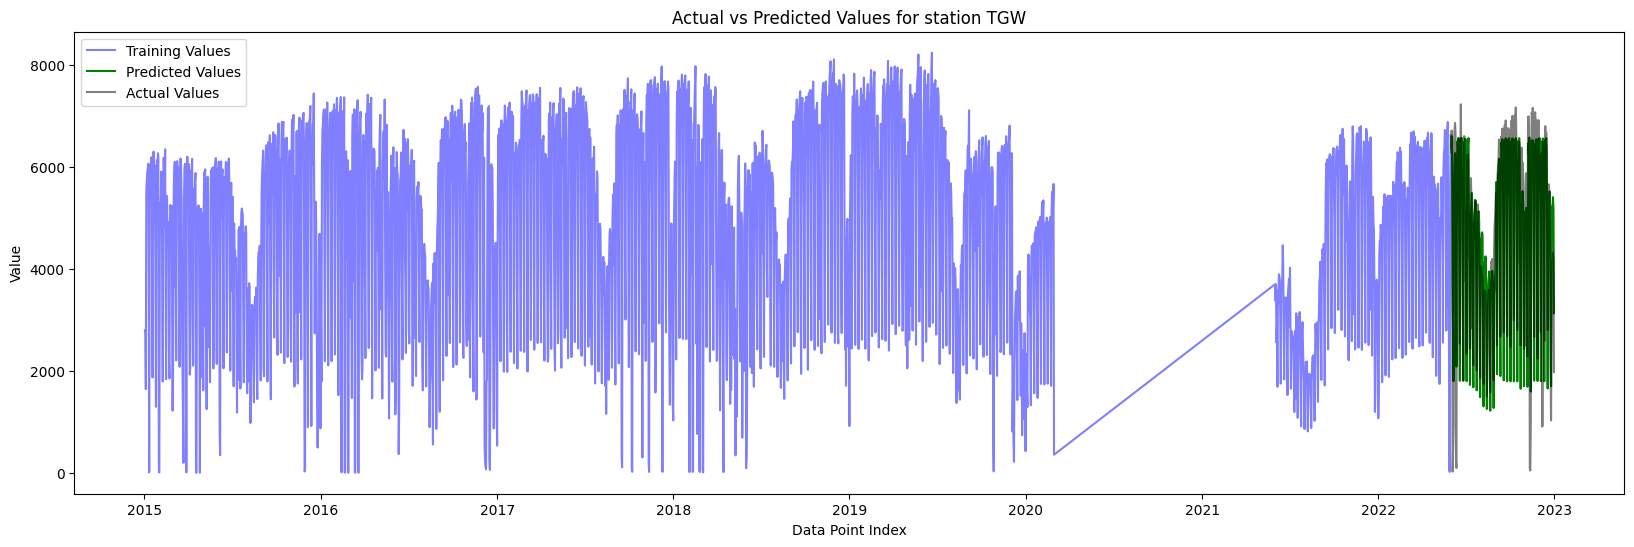

In [ ]:
# Display predictions for the sample
idx=1
for station in sample_train.keys():
    if (idx<=4):
        utils.show_predictions_results_one_station(sample_train,
                                sample_test,
                                sample_test_true,
                                station)      
    idx+=1

---

## 3: Attempt for submission

### 3.1: Data Preparation

In [18]:
# Load the data
x_train = pd.read_csv('train_f_x.csv')
y_train = pd.read_csv('y_train_sncf.csv')
x_test = pd.read_csv('x_test.csv')

In [19]:
# Create test and train dictionnaries per station
df_per_station_train, df_per_station_test = utils.prepare_data(x_train, y_train, x_test)

In [20]:
# Create y_predicted_v4 to store predictions
y_predicted_v4 = utils.create_y_attempt(x_test)

In [21]:
# Exclude station 'QD6'
df_per_station_test_v2 = {
    station: df
    for station, df in df_per_station_test.items()
    if station != 'QD6'
}

### 3.2: Prediction for 'QD6' station

In [ ]:
# Hyperparameters for QD6 prediction
seq_len = 10
units = 50
activation = 'tanh'
learning_rate = 0.001
batch_size = 32
epochs = 15


In [ ]:
y_predicted_v4 = models.submission_prediction_QD6(df_per_station_train, df_per_station_test, y_predicted_v4, seq_len, units, activation, learning_rate, batch_size, epochs)

Station QD6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


### 3.3: Prediction for the other stations

In [ ]:
# According to OptimizeParameters.ipynb
# Best hyperparameters: {'seq_len': 120, 'units': 32, 'learning_rate': 0.009866823292399145, 'batch_size': 32}

# Optimized Parameters
seq_len = 120
units = 32
activation = 'tanh'
learning_rate = 0.009866
batch_size = 32

# Epochs
epochs = 15

In [ ]:
# Execution flag
run_experiment = 0

In [ ]:
# Execution
if (run_experiment == 1):
    # Run
    y_predicted_v4, all_losses = models.lstm_submission_prediction_all(df_per_station_train, df_per_station_test, y_predicted_v4,
                                                                       seq_len, units, activation, learning_rate, batch_size,
                                                                       epochs, early_stop = False,
                                                                       features = ['job', 'ferie', 'vacances'])

    # Export prediction to CSV
    y_predicted_v4.to_csv('y_test_LSTM_v4.csv', index=False)

In [ ]:
# Reorder for submission
y_test_example = pd.read_csv('y_test_exemple.csv')
y_test_v4 = pd.read_csv('y_test_LSTM_v4.csv')
y_test_sorted = utils.reorder_for_submission(y_test_v4, y_test_example)
y_test_sorted.to_csv('y_test_LSTM_v4TEST_sorted.csv', index=False)

In [ ]:
# Submission results: 
# Your score for this submission is: 209.61572278977013

## 4: Explore Results

In [22]:
# Re-load data
x_test=pd.read_csv('x_test.csv')
y_test_v4 = pd.read_csv('y_test_LSTM_v4.csv')

In [23]:
# Data preparation
df_attempt_4 = utils.prepare_attempt_data(x_test, y_test_v4)

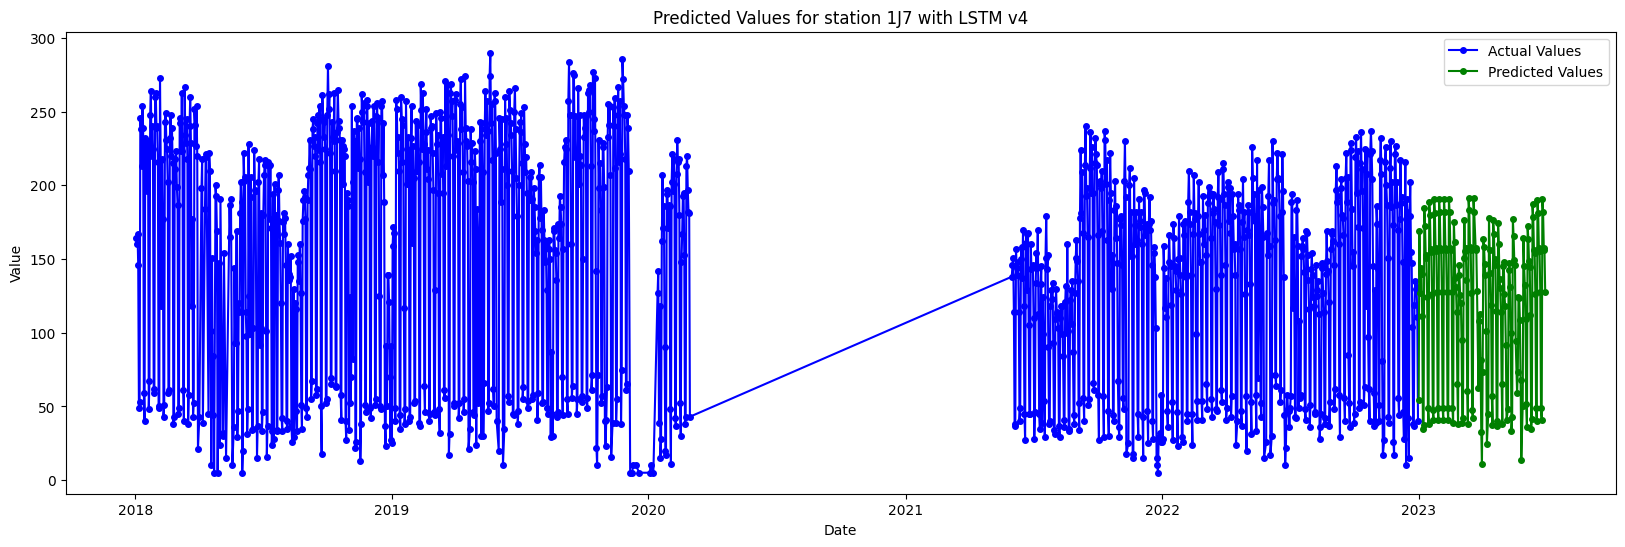

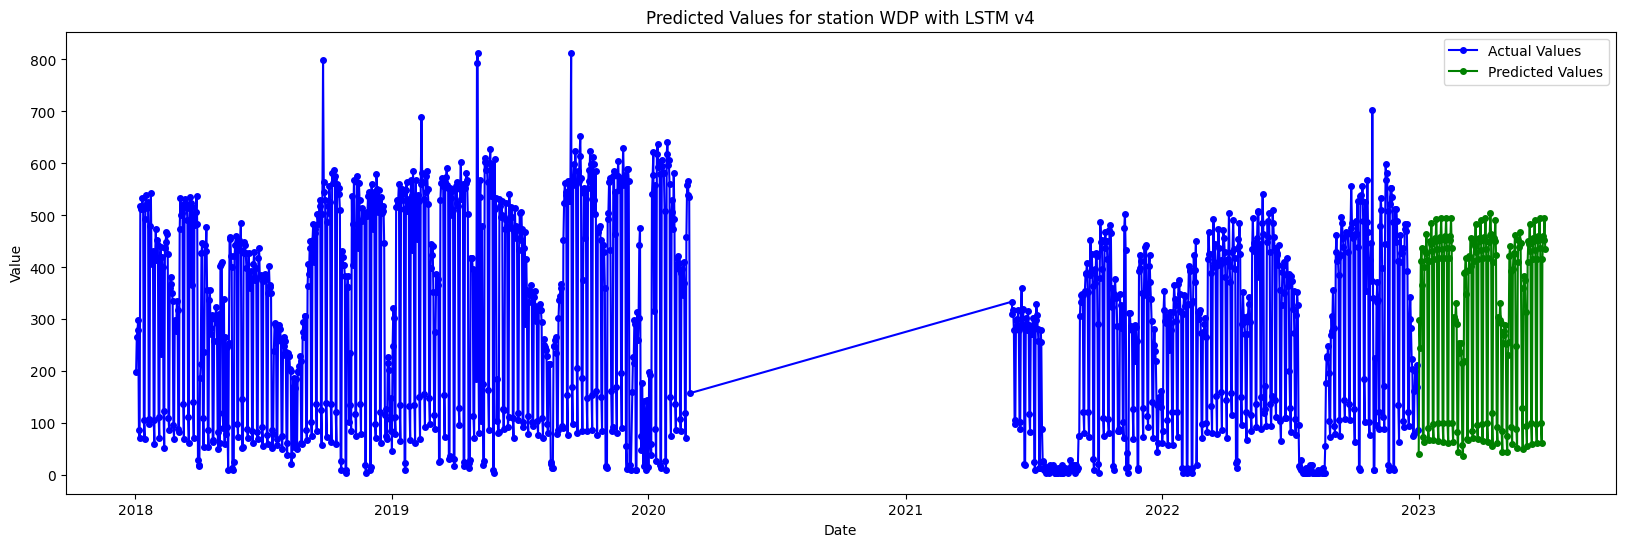

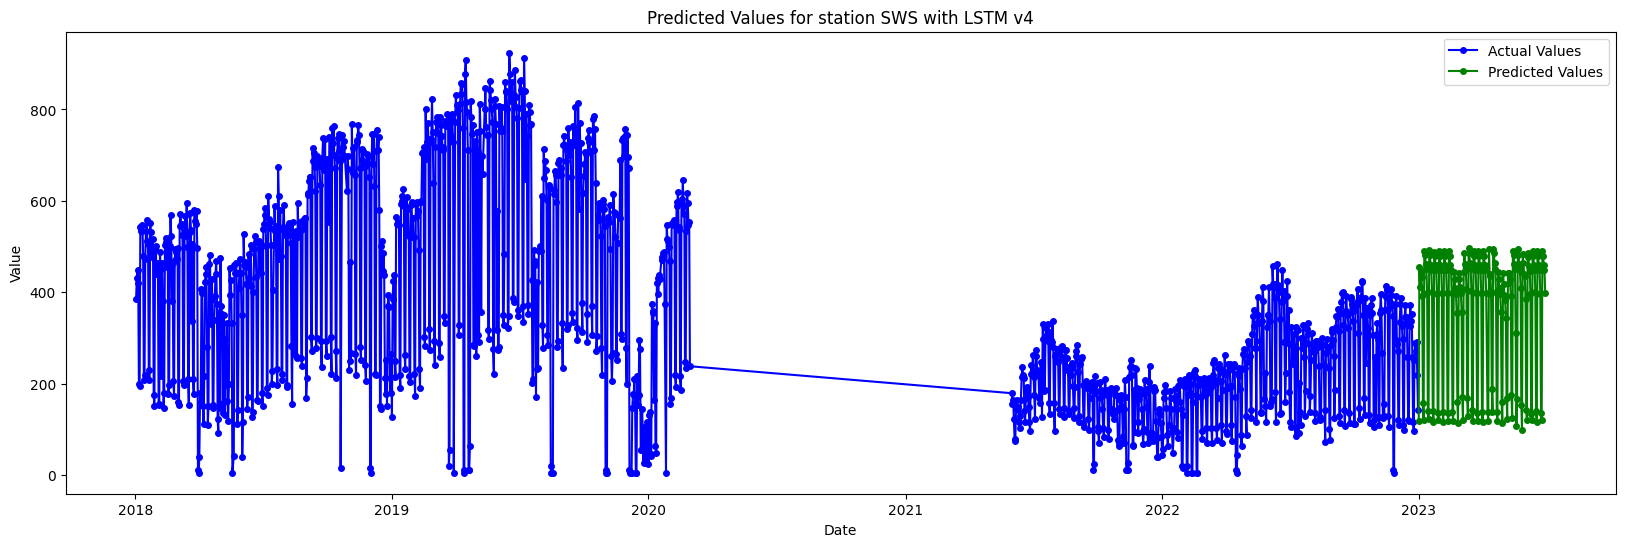

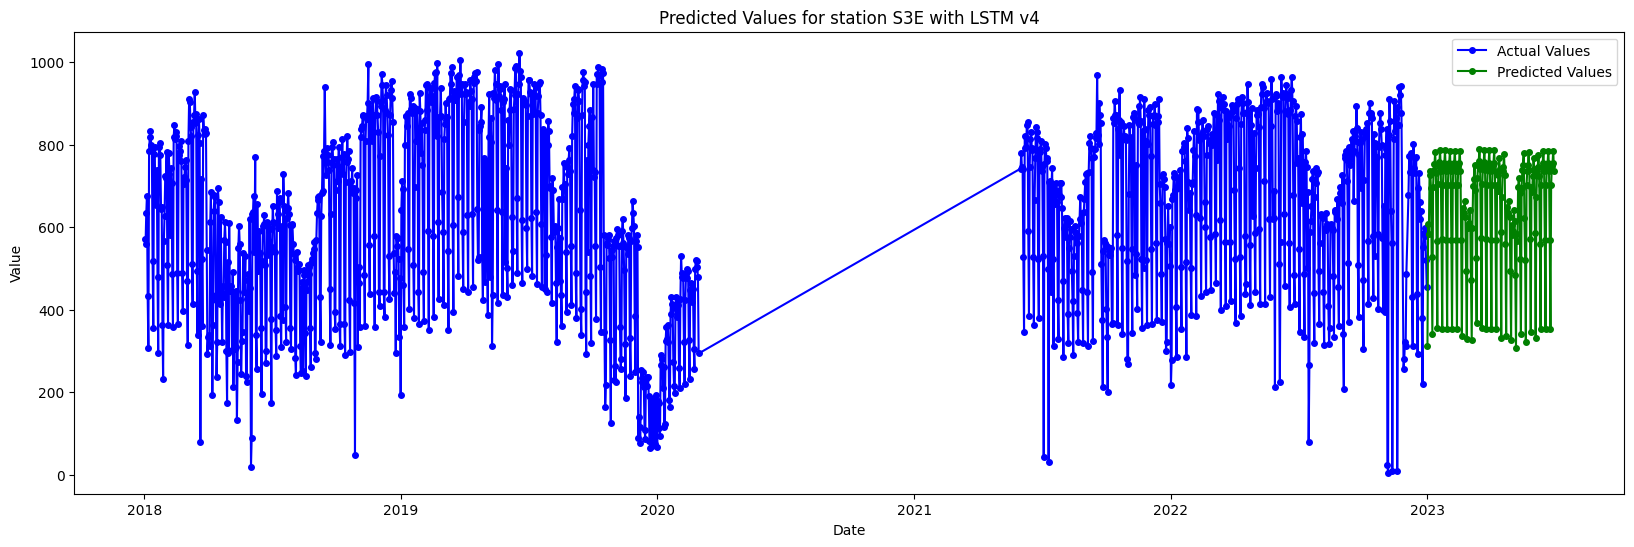

In [27]:
# Show predicted values for few stations
idx=1
for station in df_attempt_4.keys():
    if (idx >= 5):
            break
    else:
        utils.show_prediction(df_per_station_train,   # df_train
                                    df_attempt_4,     # df_test
                                    station,          # station_name
                                    'LSTM v4',        # model_name
                                    '2018-01-01')     # start_date
    idx+=1    